In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

import tsfel

In [6]:
# Load provided features
X_train = pd.read_csv(r"UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv(r"UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt", header=None).values.ravel()
X_test = pd.read_csv(r"UCI HAR Dataset\UCI HAR Dataset\test\X_test.txt", delim_whitespace=True, header=None)
y_test = pd.read_csv(r"UCI HAR Dataset\UCI HAR Dataset\test\y_test.txt", header=None).values.ravel()

C:\Users\vansh\AppData\Local\Temp\ipykernel_13620\2714548088.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(r"UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt", delim_whitespace=True, header=None)
C:\Users\vansh\AppData\Local\Temp\ipykernel_13620\2714548088.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(r"UCI HAR Dataset\UCI HAR Dataset\test\X_test.txt", delim_whitespace=True, header=None)


In [8]:
# Load activity labels
activity_labels = pd.read_csv(r"UCI HAR Dataset\UCI HAR Dataset\activity_labels.txt",
                              sep='\s+', header=None, index_col=0)[1].to_dict()

print(activity_labels)


{1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\vansh\AppData\Local\Temp\ipykernel_13620\3946443044.py:3: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+', header=None, index_col=0)[1].to_dict()


In [ ]:
data_task_3=pd.read_csv(r"testcd.csv", delim_whitespace=True, header=None)

/tmp/ipython-input-2353501974.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_task_3=pd.read_csv('/content/drive/MyDrive/testcd.csv', delim_whitespace=True, header=None)


In [ ]:
# Separate the single column into multiple columns based on the comma delimiter
data_task_3_split = data_task_3[0].str.split(',', expand=True)

# The first row is the header, so we can use it for column names
data_task_3_split.columns = data_task_3_split.iloc[0]

# Drop the header row
data_task_3_split = data_task_3_split[1:].reset_index(drop=True)

# Convert columns to appropriate data types (assuming numerical features and integer labels)
data_task_3_split[['ax', 'ay', 'az']] = data_task_3_split[['ax', 'ay', 'az']].astype(float)
data_task_3_split['label'] = data_task_3_split['label'].astype(int)

# Separate features (X) and label (y)
X_task_3 = data_task_3_split[['ax', 'ay', 'az']]
y_task_3 = data_task_3_split['label']

print("X_task_3 shape:", X_task_3.shape)
print("y_task_3 shape:", y_task_3.shape)
display(X_task_3.head())
display(y_task_3.head())

X_task_3 shape: (3000, 3)
y_task_3 shape: (3000,)


,ax,ay,az
0,0.03105,0.06670,-0.05195
1,0.17120,1.38315,-3.07720
2,-0.12805,0.01970,-0.07920
3,0.42745,2.68690,-3.78635
4,-0.22400,0.13810,-0.34165


,label
0,4
1,3
2,4
3,1
4,6


In [ ]:
X_task_3=X_task_3.to_numpy()
y_task_3=y_task_3.to_numpy()
y_task_3=y_task_3.reshape(-1,1)

In [ ]:
# === Imports ===
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, classification_report
)

# === If X_task_3, y_task_3 already exist, just sanitize shapes/types ===
X_task_3 = np.asarray(X_task_3, dtype=float)               # (n_samples, 3)
y_task_3 = np.asarray(y_task_3).reshape(-1).astype(int)    # (n_samples,)

# === Split (use stratify so class ratios stay stable) ===
X_train, X_test, y_train, y_test = train_test_split(
    X_task_3, y_task_3, test_size=0.30, random_state=42, stratify=y_task_3
)

# === Safe PCA helper (caps n_components to n_features) ===
def apply_pca(X_train, X_test, n_components=2):
    n_features = X_train.shape[1]
    k = min(n_components, n_features)
    pca = PCA(n_components=k, random_state=42)
    X_train_reduced = pca.fit_transform(X_train)
    X_test_reduced = pca.transform(X_test)
    print(f"Using {k}/{n_features} components. "
          f"Explained variance: {pca.explained_variance_ratio_.sum():.2f}")
    return X_train_reduced, X_test_reduced, pca

# === Training & evaluation ===
def train_and_evaluate(X_train, X_test, y_train, y_test, description="Model"):
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec  = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    cm   = confusion_matrix(y_test, y_pred)

    print(f"\n===== {description} =====")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n",
          classification_report(y_test, y_pred, zero_division=0))
    return acc, prec, rec



# === Depth vs Accuracy with Plotting ===
def depth_vs_accuracy(X_train, X_test, y_train, y_test, description=""):
    depths = list(range(1, 31))
    train_accs, test_accs = [], []

    for d in depths:
        clf = DecisionTreeClassifier(max_depth=d, random_state=42)
        clf.fit(X_train, y_train)
        train_accs.append(clf.score(X_train, y_train))
        test_accs.append(clf.score(X_test, y_test))

    # Find best
    best_depth = depths[int(np.argmax(test_accs))]
    best_acc = max(test_accs)
    print(f"\nBest test accuracy for {description}: {best_acc:.4f} at depth={best_depth}")

    # === Plot ===
    plt.figure(figsize=(8,5))
    plt.plot(depths, train_accs, marker="o", label="Train Accuracy")
    plt.plot(depths, test_accs, marker="s", label="Test Accuracy")
    plt.axvline(best_depth, color="r", linestyle="--", label=f"Best Depth={best_depth}")
    plt.title(f"Decision Tree Depth vs Accuracy ({description})")
    plt.xlabel("Tree Depth")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()




===== Provided Features =====
Accuracy : 0.8450
Precision: 0.8450
Recall   : 0.8450
Confusion Matrix:
 [[428  45  23   1   0   3]
 [ 45 409  42   1   0   3]
 [ 30  35 435   0   0   0]
 [  0   1   0 426  42  31]
 [  0   0   0  34 425  41]
 [  0   1   0  47  40 412]]
Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.86      0.85       500
           2       0.83      0.82      0.83       500
           3       0.87      0.87      0.87       500
           4       0.84      0.85      0.84       500
           5       0.84      0.85      0.84       500
           6       0.84      0.82      0.83       500

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000


Best test accuracy for Provided Features: 0.8450 at depth=26


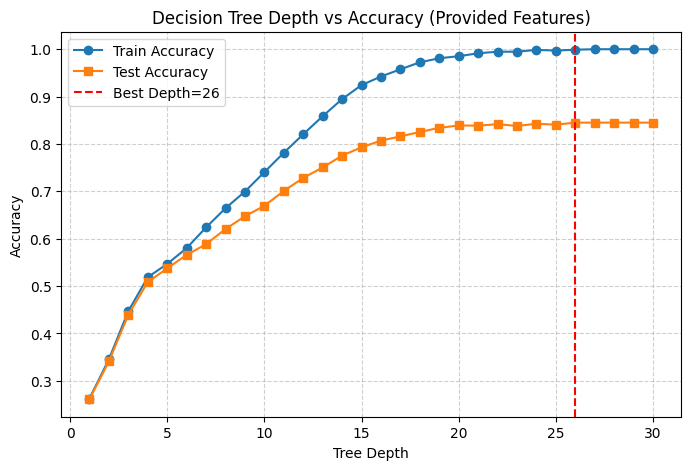

In [ ]:
train_and_evaluate(X_train, X_task_3,y_train , y_task_3, "Provided Features")
depth_vs_accuracy(X_train, X_task_3  , y_train, y_task_3, "Provided Features")

In [ ]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X_task_3, y_task_3, test_size=0.30, random_state=42
)


===== Provided Features =====
Accuracy : 0.4722
Precision: 0.4727
Recall   : 0.4722
Confusion Matrix:
 [[76 39 40  2  1  2]
 [46 73 44  2  0  3]
 [30 46 66  0  0  0]
 [ 0  0  0 68 34 31]
 [ 0  0  0 38 73 40]
 [ 1  0  0 35 41 69]]
Classification Report:
               precision    recall  f1-score   support

           1       0.50      0.47      0.49       160
           2       0.46      0.43      0.45       168
           3       0.44      0.46      0.45       142
           4       0.47      0.51      0.49       133
           5       0.49      0.48      0.49       151
           6       0.48      0.47      0.47       146

    accuracy                           0.47       900
   macro avg       0.47      0.47      0.47       900
weighted avg       0.47      0.47      0.47       900


Best test accuracy for Provided Features: 0.5433 at depth=9


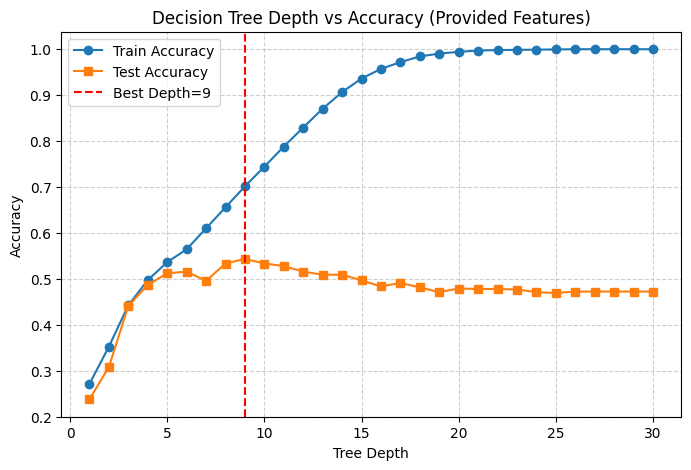

In [ ]:
train_and_evaluate(X_train_3, X_test_3,y_train_3 , y_test_3, "Provided Features")
depth_vs_accuracy(X_train_3, X_test_3, y_train_3, y_test_3, "Provided Features")